## 행정동 분류

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import warnings

warnings.filterwarnings(action = 'ignore')

### 1. 데이터 입력 및 확인

In [2]:
df = pd.read_csv('../data/행정동_기준_동별데이터.csv')
pd.set_option('display.max_columns',25)
df

,Unnamed: 0,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,ANIMAL_HSPT_NUM,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG,DONG_CODE
0,2,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,18.000000,4.000000,5.666667,39.666667,1.000000,56.666667,7.333333,2.000000,0.0,종로구,청운효자동,1111051500
1,12,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,19.000000,2.000000,11.666667,100.666667,5.000000,41.666667,10.333333,10.000000,0.0,종로구,사직동,1111053000
2,24,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,2.000000,0.000000,7.000000,52.000000,1.000000,22.000000,1.000000,1.000000,0.0,종로구,삼청동,1111054000
3,31,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,24.000000,6.000000,5.000000,30.000000,5.000000,41.000000,5.000000,4.000000,0.0,종로구,부암동,1111055000
4,34,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,28.000000,0.000000,7.000000,36.000000,0.000000,21.000000,10.000000,3.000000,0.0,종로구,평창동,1111056000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,762,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,5.333333,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,강동구,성내2동,1174065000
422,763,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,5.333333,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,강동구,성내3동,1174066000
423,764,0.000000,2.000000,0.0,1.000000,0.0,20.000000,1.000000,18.0,9.000000,100.000000,16.000000,9.000000,63.000000,10.000000,119.000000,10.000000,38.000000,0.0,강동구,길동,1174068500
424,765,0.500000,0.000000,0.0,0.000000,0.5,0.000000,0.000000,4.0,3.000000,38.000000,3.000000,5.500000,17.500000,2.000000,32.500000,0.000000,8.500000,0.0,강동구,둔촌1동,1174069000


In [3]:
df.rename(columns={'Unnamed: 0':'index'},inplace=True)
df.set_index('index',inplace=True)

In [4]:
df

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,ANIMAL_HSPT_NUM,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG,DONG_CODE
index,,,,,,,,,,,,,,,,,,,,,
2,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,18.000000,4.000000,5.666667,39.666667,1.000000,56.666667,7.333333,2.000000,0.0,종로구,청운효자동,1111051500
12,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,19.000000,2.000000,11.666667,100.666667,5.000000,41.666667,10.333333,10.000000,0.0,종로구,사직동,1111053000
24,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,2.000000,0.000000,7.000000,52.000000,1.000000,22.000000,1.000000,1.000000,0.0,종로구,삼청동,1111054000
31,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,24.000000,6.000000,5.000000,30.000000,5.000000,41.000000,5.000000,4.000000,0.0,종로구,부암동,1111055000
34,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,28.000000,0.000000,7.000000,36.000000,0.000000,21.000000,10.000000,3.000000,0.0,종로구,평창동,1111056000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,5.333333,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,강동구,성내2동,1174065000
763,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,5.333333,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,강동구,성내3동,1174066000
764,0.000000,2.000000,0.0,1.000000,0.0,20.000000,1.000000,18.0,9.000000,100.000000,16.000000,9.000000,63.000000,10.000000,119.000000,10.000000,38.000000,0.0,강동구,길동,1174068500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 2 to 766
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SUBWAY_NUM       426 non-null    float64
 1   STARBUCKS_NUM    426 non-null    float64
 2   SPORT_NUM        426 non-null    float64
 3   SAFE_DLVR_NUM    426 non-null    float64
 4   MC_NUM           426 non-null    float64
 5   KINDER_NUM       426 non-null    float64
 6   KIDS_NUM         426 non-null    float64
 7   GYM_NUM          426 non-null    float64
 8   GOLF_NUM         426 non-null    float64
 9   ACADEMY_NUM      426 non-null    float64
 10  ANIMAL_HSPT_NUM  426 non-null    float64
 11  BIKE_NUM         426 non-null    float64
 12  CAFE             426 non-null    float64
 13  CAR_SHR_NUM      426 non-null    float64
 14  CCTV_NUM         426 non-null    float64
 15  CHILD_MED_NUM    426 non-null    float64
 16  CON_NUM          426 non-null    float64
 17  DPTM_NUM        

In [6]:
df.describe()

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,ANIMAL_HSPT_NUM,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,DONG_CODE
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,4.260000e+02
mean,0.607981,1.316901,0.166667,0.622066,0.204225,21.619718,0.518779,7.448357,3.629108,57.737089,4.178404,6.523474,37.985915,4.133803,53.603286,14.323944,13.650235,0.063380,1.143415e+09
std,0.809103,2.206703,0.567719,0.503566,0.363035,18.668463,0.656479,7.034213,4.334411,56.280168,2.786655,4.725707,37.562957,3.156750,41.087587,14.060665,9.915998,0.207678,1.920778e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.833333,2.000000,0.000000,4.333333,0.000000,0.000000,0.000000,1.111052e+09
25%,0.000000,0.333333,0.000000,0.000000,0.000000,10.000000,0.000000,3.500000,1.333333,27.090909,2.700000,4.000000,19.541667,2.285714,25.946429,4.381250,8.857143,0.000000,1.126066e+09
50%,0.366667,0.666667,0.000000,0.666667,0.000000,20.000000,0.333333,6.000000,2.500000,41.166667,4.000000,5.500000,27.363636,3.500000,41.375000,10.333333,11.333333,0.000000,1.144064e+09
75%,0.833333,1.333333,0.000000,1.000000,0.285714,30.000000,0.729167,9.000000,4.500000,70.000000,5.000000,7.400000,39.250000,5.000000,65.731250,18.000000,14.729167,0.000000,1.161306e+09
max,7.000000,19.000000,5.000000,3.500000,4.000000,170.000000,4.250000,60.000000,33.000000,480.250000,24.000000,44.000000,274.000000,24.000000,251.000000,101.000000,85.000000,1.500000,1.174070e+09


In [15]:
col = df.columns[:-3]
data = df[col].values

### 2. 인구 밀도 데이터 생성

In [8]:
area_df = pd.read_csv('../data/AREA_DONG.csv')
del(area_df['SI_DO'])
del(area_df['GU'])
area_df

,DONG,AREA
0,청운동,"797,032.5"
1,신교동,"99,144.0"
2,궁정동,"73,042.7"
3,효자동,"59,135.9"
4,창성동,"59,706.1"
...,...,...
462,둔촌동,"2,461,511.8"
463,암사동,"4,711,364.2"
464,성내동,"1,958,987.6"
465,천호동,"3,065,543.3"


In [9]:
population_df = pd.read_csv('../data/POPU_DONG.csv')
del(population_df['DONG_CODE'])
del(population_df['SI_DO'])
del(population_df['GU'])
population_df

,DONG,NUM_POPU
0,청운동,2330
1,신교동,1393
2,궁정동,179
3,효자동,572
4,창성동,439
...,...,...
462,둔촌동,24311
463,암사동,66490
464,성내동,65873
465,천호동,85928


In [10]:
area_df['idx'] = [i for i in range(467)]
area_df.set_index('idx',inplace=True)
population_df['idx'] = [i for i in range(467)]
population_df.set_index('idx',inplace=True)

In [11]:
density_df = pd.merge(area_df,population_df,how='outer',on='idx')
density_df

,DONG_x,AREA,DONG_y,NUM_POPU
idx,,,,
0,청운동,"797,032.5",청운동,2330
1,신교동,"99,144.0",신교동,1393
2,궁정동,"73,042.7",궁정동,179
3,효자동,"59,135.9",효자동,572
4,창성동,"59,706.1",창성동,439
...,...,...,...,...
462,둔촌동,"2,461,511.8",둔촌동,24311
463,암사동,"4,711,364.2",암사동,66490
464,성내동,"1,958,987.6",성내동,65873


In [12]:
del(density_df['DONG_y'])
density_df.columns = ['법정동','면적','인구']
density_df

,법정동,면적,인구
idx,,,
0,청운동,"797,032.5",2330
1,신교동,"99,144.0",1393
2,궁정동,"73,042.7",179
3,효자동,"59,135.9",572
4,창성동,"59,706.1",439
...,...,...,...
462,둔촌동,"2,461,511.8",24311
463,암사동,"4,711,364.2",66490
464,성내동,"1,958,987.6",65873


In [13]:
area = density_df['면적'].tolist()
population = density_df['인구'].tolist()
for i in range(len(area)):
    area[i] = float(area[i].replace(',',''))
density = []
for i in range(len(density_df.index)):
    dense = population[i] / area[i]
    density.append(dense)
density_df['인구밀도'] = density
density_df

,법정동,면적,인구,인구밀도
idx,,,,
0,청운동,"797,032.5",2330,0.002923
1,신교동,"99,144.0",1393,0.014050
2,궁정동,"73,042.7",179,0.002451
3,효자동,"59,135.9",572,0.009673
4,창성동,"59,706.1",439,0.007353
...,...,...,...,...
462,둔촌동,"2,461,511.8",24311,0.009876
463,암사동,"4,711,364.2",66490,0.014113
464,성내동,"1,958,987.6",65873,0.033626


In [17]:
# GMM 적용
from sklearn.mixture import GaussianMixture
# n_components로 미리 군집 개수 설정
gmm = GaussianMixture(n_components=10, n_init=3, random_state=0).fit(data)
# n_init : 모델 반복 횟수 -> 파라미터를 무작위로 선정하여 수렴할 때까지 학습
gmm_labels = gmm.predict(data)

In [18]:
# GMM 후 클러스터링 레이블을 따로 설정
df['gmm_cluster_3'] = gmm_labels
df['gmm_cluster_3'].value_counts()

5    238
0     55
3     38
1     30
8     29
9     16
7      6
6      5
2      5
4      4
Name: gmm_cluster_3, dtype: int64

In [19]:
from sklearn.metrics import silhouette_score, silhouette_samples
score_samples = silhouette_samples(data, df['gmm_cluster_3'])
df['silhouette_coeff']=score_samples

print()

average_score = silhouette_score(data, df['gmm_cluster_3'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))


Silhouette Analysis Score:0.192


In [20]:
df.groupby('gmm_cluster_3')['silhouette_coeff'].mean()

gmm_cluster_3
0    0.100748
1    0.178721
2    0.383053
3    0.228050
4    0.750972
5    0.168581
6    0.307771
7    0.345269
8    0.412521
9    0.092192
Name: silhouette_coeff, dtype: float64

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주 성분의 갯수 : 2
pca_transformed = pca.fit_transform(data)
df['pca_x']=pca_transformed[:,0]
df['pca_y']=pca_transformed[:,1]

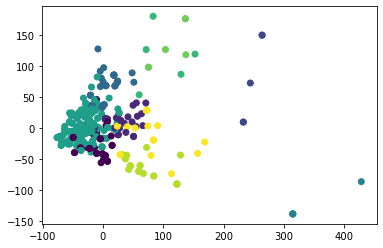

In [22]:
plt.scatter(x=df.loc[:,'pca_x'], y=df.loc[:,'pca_y'],c=df['gmm_cluster_3'])

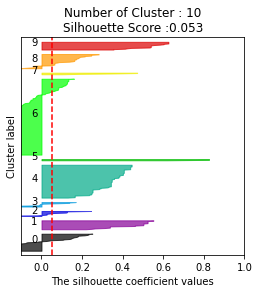

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

X_features = data
cluster = GaussianMixture(n_components=10, n_init=100, random_state=0)
cluster_labels = cluster.fit_predict(data)
sil_avg = silhouette_score(X_features,cluster_labels)
sil_values = silhouette_samples(X_features,cluster_labels)

y_lower = 10
fig, axs = plt.subplots(figsize=(4, 4), nrows=1, ncols=1)

axs.set_title('Number of Cluster : '+ str(10)+'\n' \
                  'Silhouette Score :' + str(round(sil_avg,3)) )
axs.set_xlabel("The silhouette coefficient values")
axs.set_ylabel("Cluster label")
axs.set_xlim([-0.1, 1])
axs.set_ylim([0, len(X_features) + (10 + 1) * 10])
axs.set_yticks([])  # Clear the yaxis labels / ticks
axs.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

for i in range(10):
    ith_cluster_sil_values = sil_values[cluster_labels==i]
    ith_cluster_sil_values.sort()

    size_cluster_i = ith_cluster_sil_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 10)
    axs.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                        facecolor=color, edgecolor=color, alpha=0.7)
    axs.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

axs.axvline(x=sil_avg, color="red", linestyle="--")

In [24]:
best_n = 0
best_silhouette_score = 0

for i in range(2,21):
    gmm = GaussianMixture(n_components=i, n_init=10, random_state=0).fit(data)
    gmm_labels = gmm.predict(data)
    
    score_samples = silhouette_samples(data, gmm_labels)
    average_score = silhouette_score(data, gmm_labels)
    print('Silhouette Analysis Score:{0:.3f}'.format(average_score))
    print()
    
    if average_score > best_silhouette_score:
        best_n = i
        best_silhouette_score = average_score
print('best n :', best_n, 'best score :', best_silhouette_score)

Silhouette Analysis Score:0.334

Silhouette Analysis Score:0.156

Silhouette Analysis Score:0.212

Silhouette Analysis Score:0.201

Silhouette Analysis Score:0.219

Silhouette Analysis Score:0.119

Silhouette Analysis Score:0.154

Silhouette Analysis Score:0.097

Silhouette Analysis Score:0.055

Silhouette Analysis Score:0.121

Silhouette Analysis Score:0.215

Silhouette Analysis Score:0.223

Silhouette Analysis Score:0.279

Silhouette Analysis Score:0.198

Silhouette Analysis Score:0.230

Silhouette Analysis Score:0.246

Silhouette Analysis Score:0.253

Silhouette Analysis Score:0.263

Silhouette Analysis Score:0.247

best n : 2 best score : 0.3335687312324732


Silhouette Analysis Score:0.334

Silhouette Analysis Score:0.156

Silhouette Analysis Score:0.212

Silhouette Analysis Score:0.201

Silhouette Analysis Score:0.219

Silhouette Analysis Score:0.119

Silhouette Analysis Score:0.154

Silhouette Analysis Score:0.097

Silhouette Analysis Score:0.055

Silhouette Analysis Score:0.121

Silhouette Analysis Score:0.215

Silhouette Analysis Score:0.223

Silhouette Analysis Score:0.279

Silhouette Analysis Score:0.198

Silhouette Analysis Score:0.230

Silhouette Analysis Score:0.246

Silhouette Analysis Score:0.253

Silhouette Analysis Score:0.263

Silhouette Analysis Score:0.247

best n : 2 best score : 0.3335687312324732


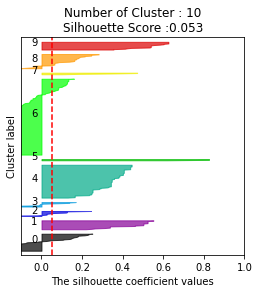

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

X_features = data
cluster = GaussianMixture(n_components=10, n_init=100, random_state=0)
cluster_labels = cluster.fit_predict(data)
sil_avg = silhouette_score(X_features,cluster_labels)
sil_values = silhouette_samples(X_features,cluster_labels)

y_lower = 10
fig, axs = plt.subplots(figsize=(4, 4), nrows=1, ncols=1)

axs.set_title('Number of Cluster : '+ str(10)+'\n' \
                  'Silhouette Score :' + str(round(sil_avg,3)) )
axs.set_xlabel("The silhouette coefficient values")
axs.set_ylabel("Cluster label")
axs.set_xlim([-0.1, 1])
axs.set_ylim([0, len(X_features) + (10 + 1) * 10])
axs.set_yticks([])  # Clear the yaxis labels / ticks
axs.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

for i in range(10):
    ith_cluster_sil_values = sil_values[cluster_labels==i]
    ith_cluster_sil_values.sort()

    size_cluster_i = ith_cluster_sil_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 10)
    axs.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                        facecolor=color, edgecolor=color, alpha=0.7)
    axs.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

axs.axvline(x=sil_avg, color="red", linestyle="--")

best_n = 0
best_silhouette_score = 0

for i in range(2,21):
    gmm = GaussianMixture(n_components=i, n_init=10, random_state=0).fit(data)
    gmm_labels = gmm.predict(data)
    
    score_samples = silhouette_samples(data, gmm_labels)
    average_score = silhouette_score(data, gmm_labels)
    print('Silhouette Analysis Score:{0:.3f}'.format(average_score))
    print()
    
    if average_score > best_silhouette_score:
        best_n = i
        best_silhouette_score = average_score
print('best n :', best_n, 'best score :', best_silhouette_score)

array([[<AxesSubplot:title={'center':'SUBWAY_NUM'}>,
        <AxesSubplot:title={'center':'STARBUCKS_NUM'}>,
        <AxesSubplot:title={'center':'SPORT_NUM'}>,
        <AxesSubplot:title={'center':'SAFE_DLVR_NUM'}>,
        <AxesSubplot:title={'center':'MC_NUM'}>],
       [<AxesSubplot:title={'center':'KINDER_NUM'}>,
        <AxesSubplot:title={'center':'KIDS_NUM'}>,
        <AxesSubplot:title={'center':'GYM_NUM'}>,
        <AxesSubplot:title={'center':'GOLF_NUM'}>,
        <AxesSubplot:title={'center':'ACADEMY_NUM'}>],
       [<AxesSubplot:title={'center':'ANIMAL_HSPT_NUM'}>,
        <AxesSubplot:title={'center':'BIKE_NUM'}>,
        <AxesSubplot:title={'center':'CAFE'}>,
        <AxesSubplot:title={'center':'CAR_SHR_NUM'}>,
        <AxesSubplot:title={'center':'CCTV_NUM'}>],
       [<AxesSubplot:title={'center':'CHILD_MED_NUM'}>,
        <AxesSubplot:title={'center':'CON_NUM'}>,
        <AxesSubplot:title={'center':'DPTM_NUM'}>,
        <AxesSubplot:title={'center':'DONG_CODE'}>,
  

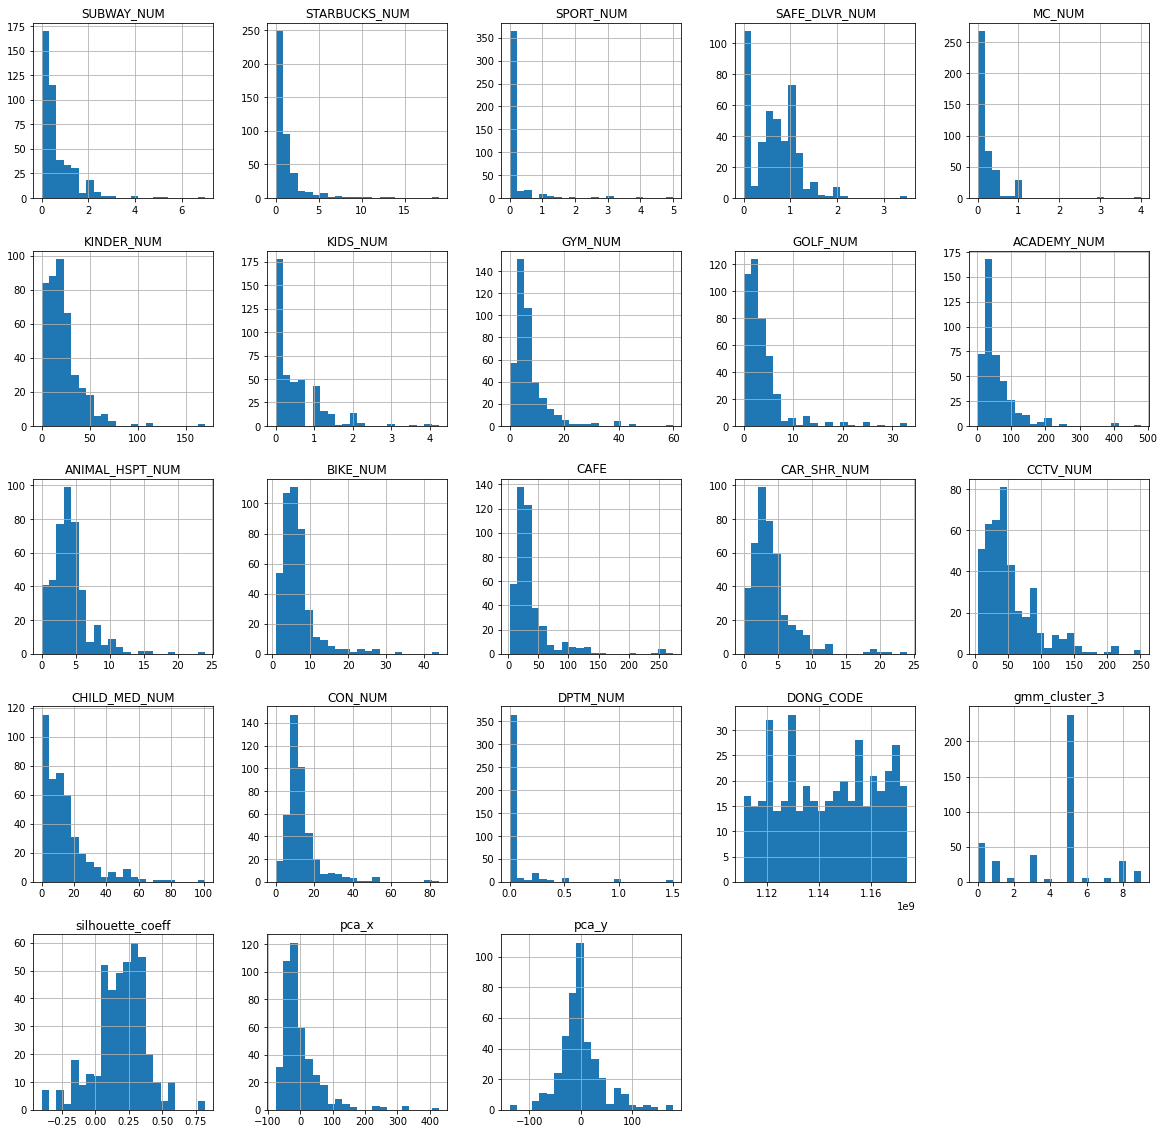

In [26]:
df.hist(figsize = (20, 20), bins = 22, legend = False)